I found it easier to work with geopandas on google colab

Done by: Merna Alghannam, Team 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install geopandas
# !pip install geoplot

In [4]:
import pandas as pd
import numpy as np
import geopandas
import geopandas
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import geoplot

In [5]:
ROOT_FOLDER = '/content/drive/MyDrive/'

Map for Municipality VS eviction rate per rented household

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


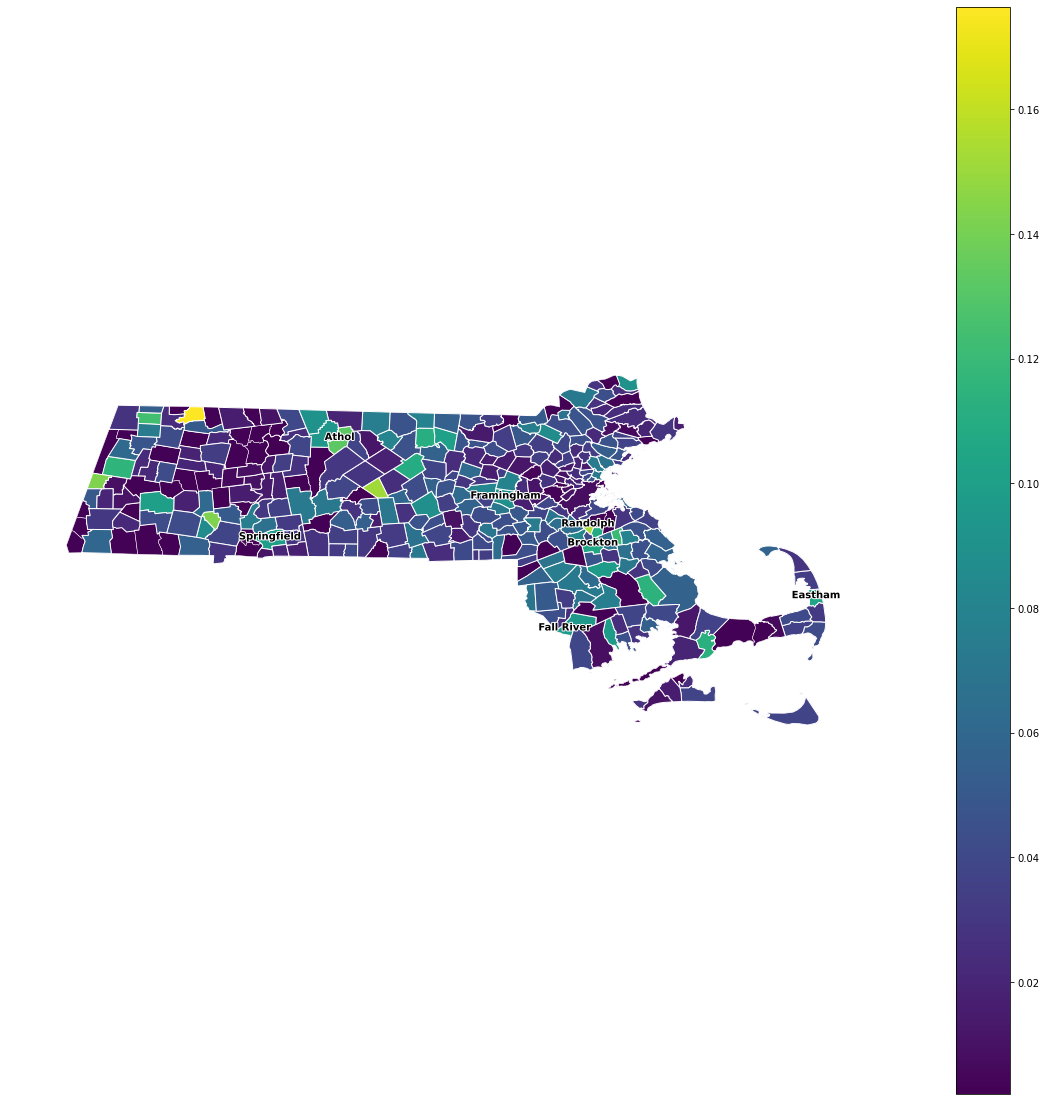

In [43]:
#get the data of all municipalities and its evcition rate per rented household value
households = pd.read_csv(ROOT_FOLDER + "Eviction_Cases/household_normalization.csv",index_col=0)

#This data can be retrieved from group 1/census_track_data_for_geopandas_merna/cb_2018_25_cousub_500k.shp")
# or also the same name from our github repo
MA_df = geopandas.read_file(ROOT_FOLDER + "census_track_data_for_geopandas_merna/cb_2018_25_cousub_500k.shp")

#merge the ma_df geo dataset with the df 
#dataset in order for the plot to have the eviction per rented household column in df
geo = pd.merge(households,MA_df,left_on='Muni', right_on='NAME')



#turn geo dataframe into a map
map = geopandas.GeoDataFrame(geo)

#This method might not be the best way to create a geopandas plot. It was last minute. However, there are 
#seveal sources that shows better methods
#make ma_df the ax or overlay? for the final map below
ax = MA_df.plot(facecolor='#440256', edgecolor='white',linewidth=0.5, figsize=(20,20))
#plot geoplot where heatmap corelates to eviction rate per rented household
geoplot.choropleth(map, ax=ax, hue=geo['Evictions per Rented Households'],cmap='viridis', legend=True, edgecolor="white")

#Municipalities with highest eviction rates - 2 municpalities
#for each population bracket
highest_eviction = ["Randolph", "Brockton", "Eastham", "Athol",
                    "Framingham", "Springfield", "Fall River"]

#Create coords column by turning polygon geometry to points, in order to ease annotations
geo['coords'] = geo['geometry'].apply(lambda x: x.representative_point().coords[:])
geo['coords'] = [coords[0] for coords in geo['coords']]

#Annotate the municipalities with highest eviction rates
for idx, row in geo.iterrows():
  if row['NAME'] in highest_eviction:
    plt.annotate(s=row["NAME"], xy=row['coords'],
                 horizontalalignment='center', color='black', size=10, weight='bold', path_effects=[pe.withStroke(linewidth=2, foreground="white")])
# Display
plt.show()


Map for Municipality VS eviction fillings number 

In [7]:
#this data can be found in our github repo under same file name here
#or the shared google drive in Datasets
#These are data for evictions in two files
df = pd.read_csv(ROOT_FOLDER + "eviction_data/2021-11-02-bu-m0_aug.csv",index_col=0) 
df1 = pd.read_csv(ROOT_FOLDER + "eviction_data/2021-11-02-2220-bu-m18_aug.csv",index_col=0) 
comb_df = pd.concat([df,df1], axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
#count number of evictions per municipalities and have then in a new dataframe
eviction_fillings = pd.DataFrame(comb_df['property_address_city'].value_counts())

In [9]:
#merge the ma_df geo dataset with the eviction_fillings
#dataset in order for the plot to have the eviction fillings number for all municipalities in massachusetts column in eviction_fillings
geo_evict_fillings = pd.merge(eviction_fillings,MA_df,left_on=eviction_fillings.index, right_on='NAME')

In [10]:
#remove all municpalities with less than 10 evictions
geo_evict_fillings = geo_evict_fillings[~geo_evict_fillings['property_address_city'].isin([1,2,3,4,5,6,7,8,9,10])]

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


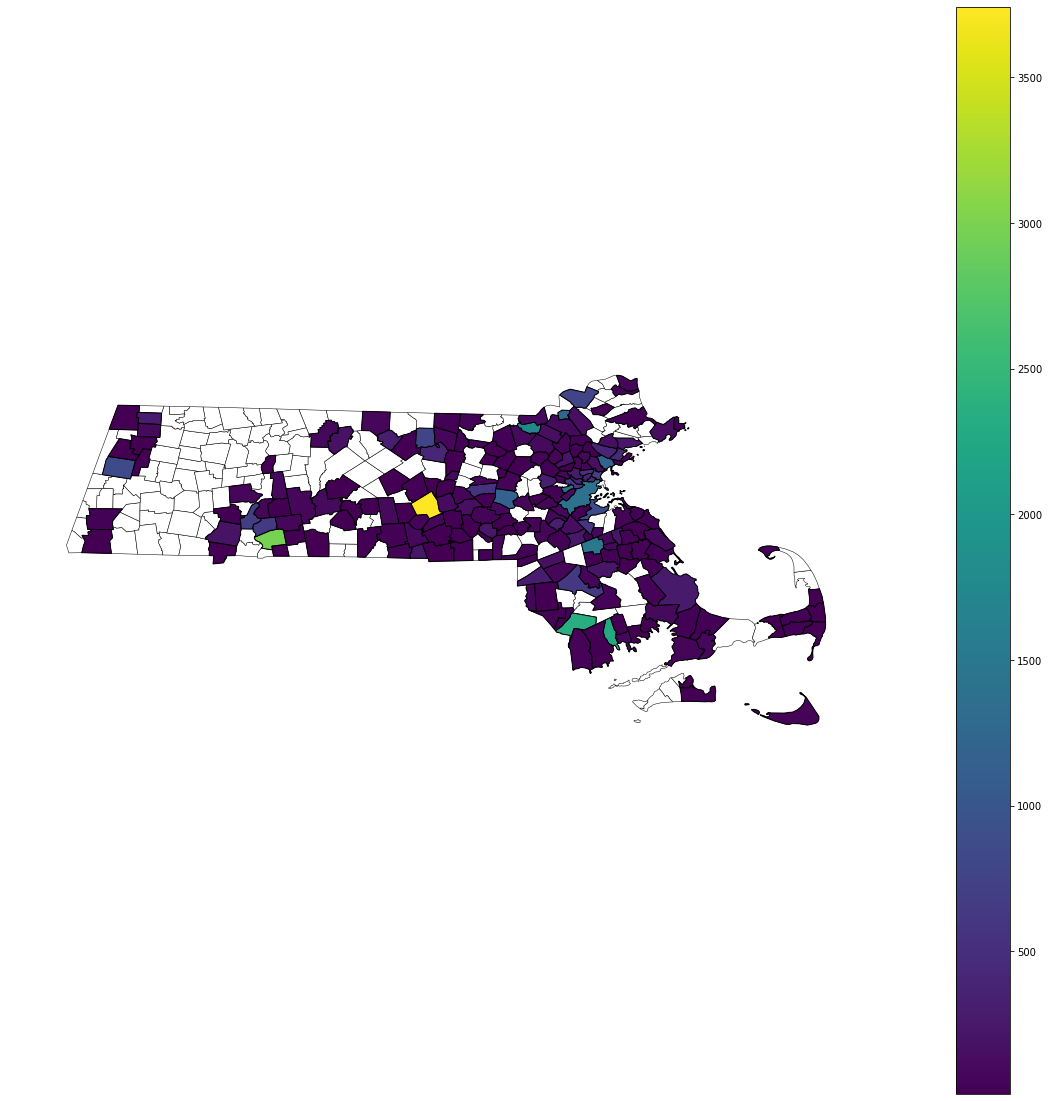

In [11]:
#This plot shows there are miscalculations in household_normalized dataset or while clean. Code should be double checked
#as it does not have all municipalities. The household_normalized code
ax = MA_df.plot(facecolor='white', edgecolor='black',linewidth=0.5, figsize=(20,20))

#create map for geo_evict_fillings
map = geopandas.GeoDataFrame(geo_evict_fillings)

#plot map where the heatmap represents the number of eviction fillings in that municipality
geoplot.choropleth(map, ax=ax, hue=geo_evict_fillings['property_address_city'],cmap='viridis', legend=True)

# Display
plt.show()

In [23]:
#retrieve the income dataset that was merged with our dataset
#this file is under Eviction_Cases in github repo
income_with_rate = pd.read_csv(ROOT_FOLDER + "Eviction_Cases/income_normalized.csv", index_col=0)

#merge the ma_df geo dataset with the income_with_rate
#dataset in order for the plot to have the median income and rent burden for all 
#municipalities in massachusetts column in income_with_rate
geo_income = geo = pd.merge(income_with_rate,MA_df,left_on='Muni', right_on='NAME')

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


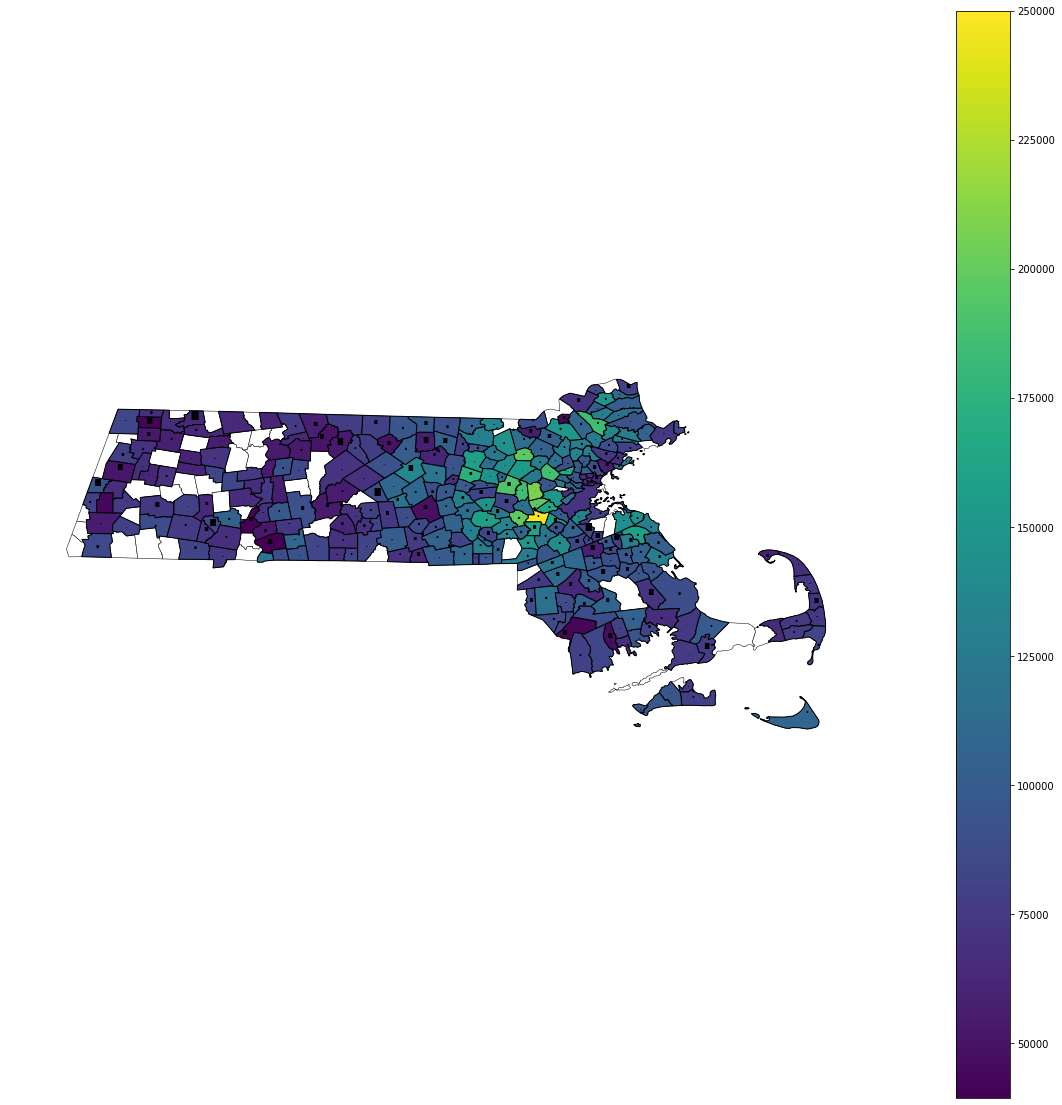

In [28]:
ax = MA_df.plot(facecolor='white', edgecolor='black',linewidth=0.5, figsize=(20,20))
#create a map for geo_income
map = geopandas.GeoDataFrame(geo_income)

#plot map where the heatmap represents 
#the median income in that municipality
geoplot.choropleth(map, ax=ax, hue=geo_income['Median Income'],cmap='viridis', legend=True)


geo_income['coords'] = geo_income['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_income['coords'] = [coords[0] for coords in geo_income['coords']]

#plot on each municipality a circle and 
#its size represents its eviction rate per 400 households
#this is very simple and there are definitally several
#better ways to do this
for idx, row in geo_income.iterrows():
  if row['NAME'] in geo_income.Muni.values:
    plt.annotate(s=".", xy=row['coords'],
                 horizontalalignment='center', color='black', size=row['Evictions per Rented Households']*400)
# Display
plt.show()

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


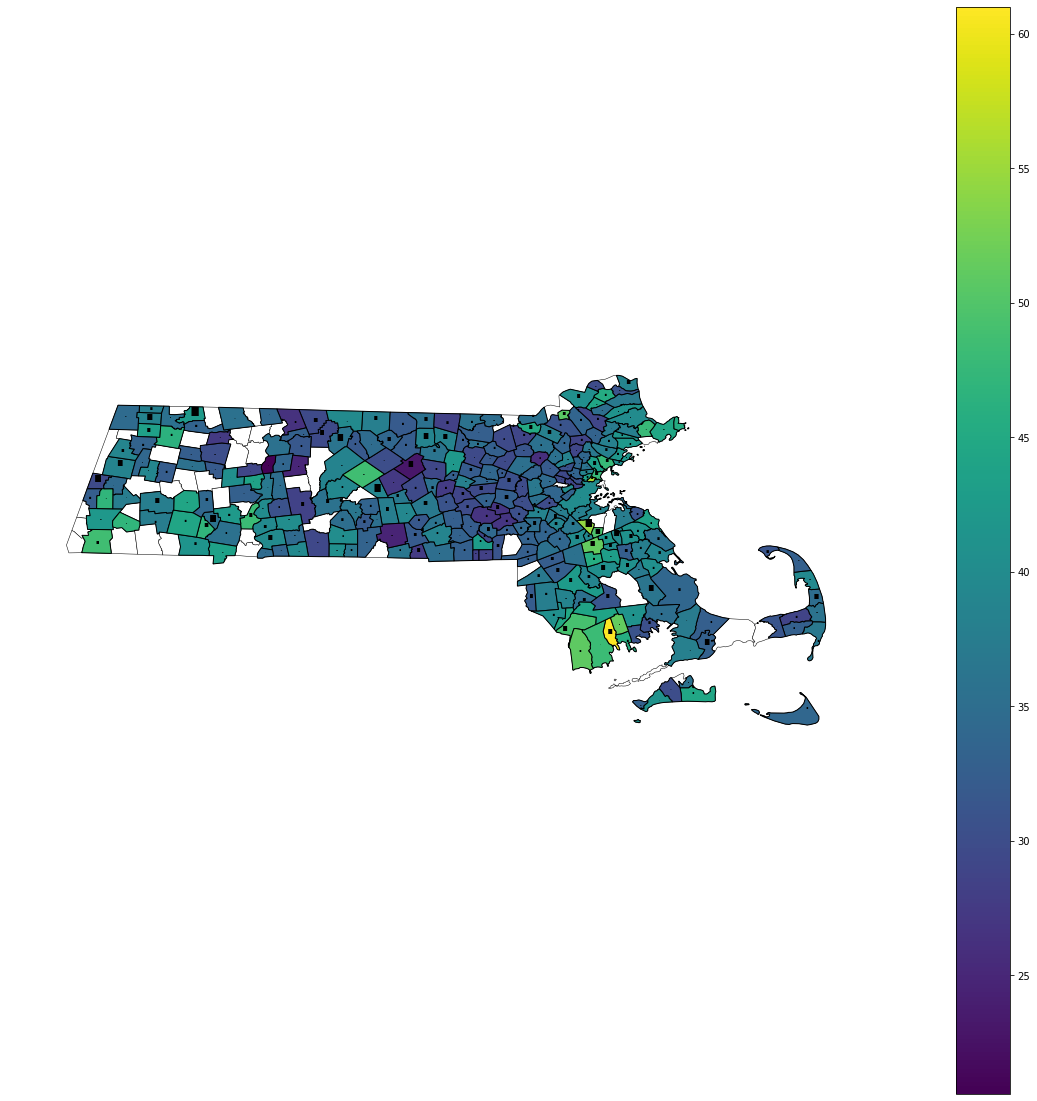

In [29]:
ax = MA_df.plot(facecolor='white', edgecolor='black',linewidth=0.5, figsize=(20,20))
#plot map where the heatmap represents 
#the rent burden in that municipality
geoplot.choropleth(map, ax=ax, hue=geo_income['Rent Burden'],cmap='viridis', legend=True)


geo_income['coords'] = geo_income['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_income['coords'] = [coords[0] for coords in geo_income['coords']]

#plot on each municipality a circle and 
#its size represents its eviction rate per 400 households
#this is very simple and there are definitally several
#better ways to do this
for idx, row in geo_income.iterrows():
  if row['NAME'] in geo_income.Muni.values:
    plt.annotate(s=".", xy=row['coords'],
                 horizontalalignment='center', color='black', size=row['Evictions per Rented Households']*400)
# Display
plt.show()

# MAP For percent of rent occupied in a municipality

As expected, rural areas have many vacant spaces

In [37]:
geo_percent_occupied = pd.merge(households,MA_df,left_on='Muni', right_on='NAME')

/usr/local/lib/python3.7/dist-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


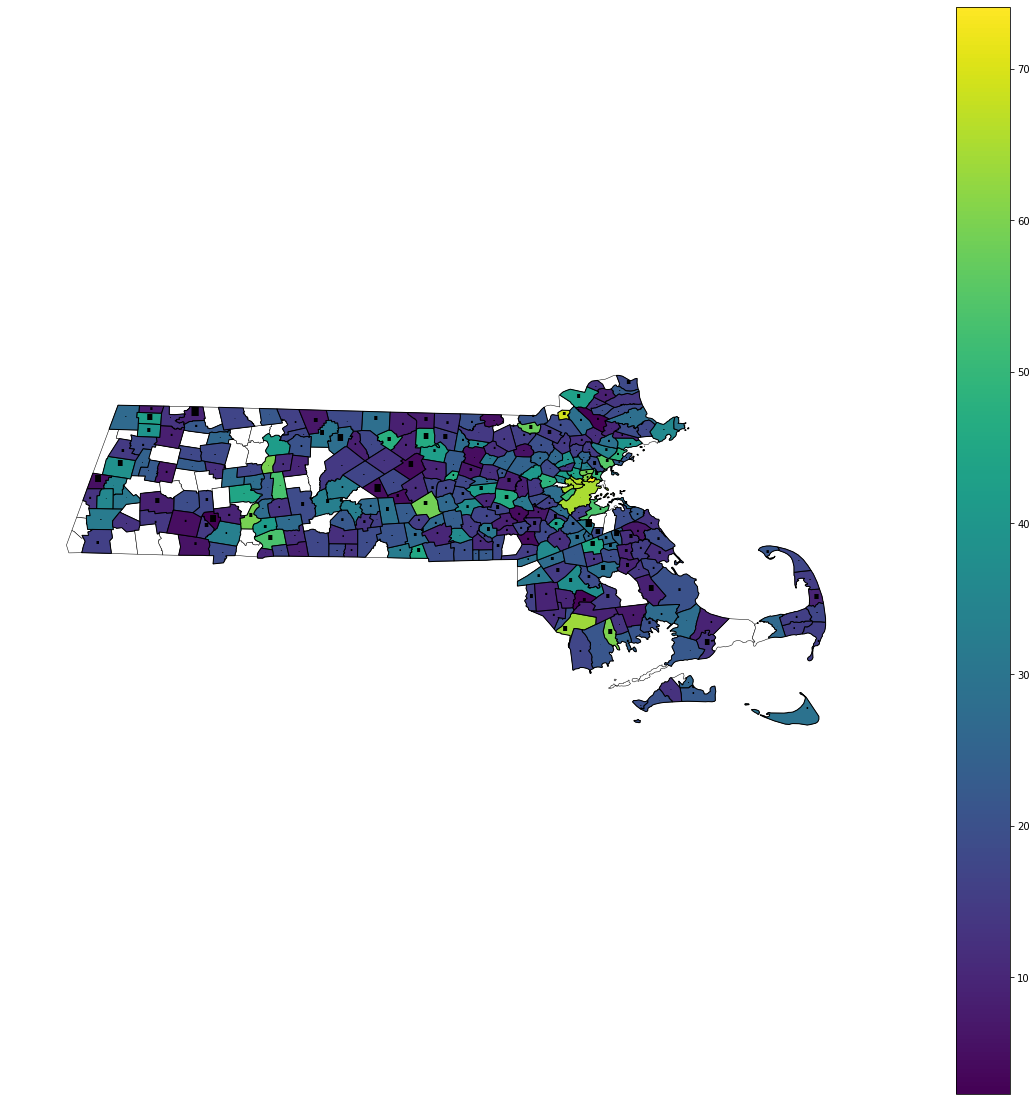

In [38]:
ax = MA_df.plot(facecolor='white', edgecolor='black',linewidth=0.5, figsize=(20,20)) 

#plot map where the heatmap represents 
#the pervent of rent occupied in that municipality
geoplot.choropleth(map, ax=ax, hue=geo_percent_occupied['Renter Occupied Pct'],cmap='viridis', legend=True)

geo_percent_occupied['coords'] = geo_percent_occupied['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_percent_occupied['coords'] = [coords[0] for coords in geo_percent_occupied['coords']]

#plot on each municipality a circle and 
#its size represents its eviction rate per 400 households
#this is very simple and there are definitally several
#better ways to do this
for idx, row in geo_percent_occupied.iterrows():
  if row['NAME'] in geo_percent_occupied.Muni.values:
    plt.annotate(s=".", xy=row['coords'],
                 horizontalalignment='center', color='black', size=row['Evictions per Rented Households']*400)
# Display
plt.show()